<a href="https://colab.research.google.com/github/ParvinGhaffarzadeh/Graph/blob/main/Graph_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("C:\\Users\\parak_gh\\f.csv")
df

,From,To
0,Ali,Mahdi
1,Sara,Fariba
2,Farshid,Tina
3,Omid,Sina
4,Ali,Reza
5,Ali,Davood
6,Sara,Javad
7,Sara,Karim
8,Farshid,Matin
9,Farshid,Rahim


In [ ]:
G= nx.Graph()
G = nx.from_pandas_edgelist(df,'From','To')

In [ ]:
print(nx.info(G))

Graph with 18 nodes and 21 edges


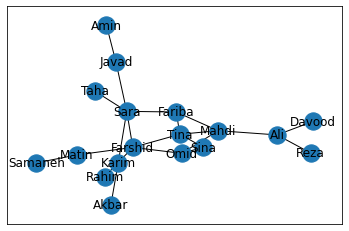

In [ ]:
nx.draw_networkx(G)

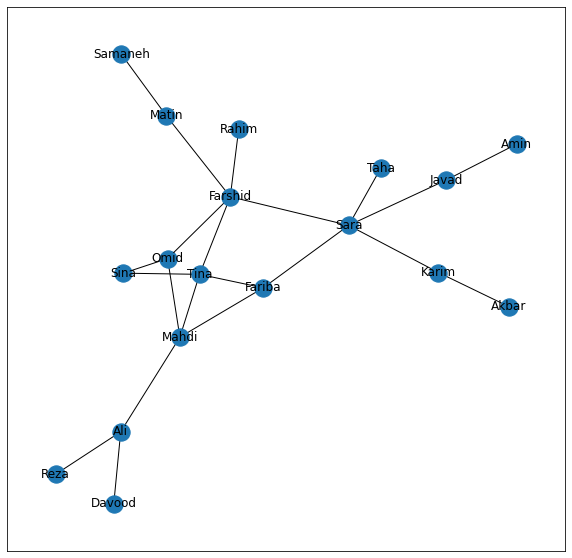

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G)
plt.show()

In [ ]:
deg= dict(G.degree())
nx.set_node_attributes(G,deg,'degree')

bc=nx.betweenness_centrality(G)
nx.set_node_attributes(G,bc,'BC')

t= pd.DataFrame.from_dict(dict(G.nodes(data=True)),orient='index')
t[0:5]

,degree,BC
Ali,3,0.227941
Mahdi,4,0.318627
Sara,5,0.514706
Fariba,3,0.213235
Farshid,5,0.421569


In [ ]:
t.sort_values('BC',ascending=False)[0:4]

,degree,BC
Sara,5,0.514706
Farshid,5,0.421569
Mahdi,4,0.318627
Ali,3,0.227941


In [ ]:
max(deg.keys() , key=lambda  x:deg[x])

'Sara'

In [ ]:
nx.shortest_path(G,"Farshid","Taha")

['Farshid', 'Sara', 'Taha']

In [ ]:
nx.degree_centrality(G)['Sara']

0.29411764705882354

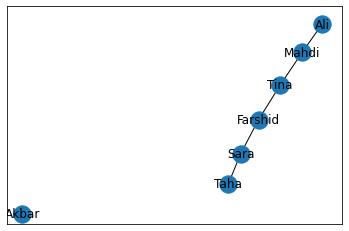

In [ ]:
S = G.subgraph(['Farshid', 'Sara', 'Taha','Tina','Ali','Mahdi','Akbar'])
nx.draw_networkx(S)

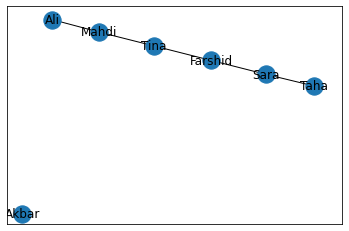

In [ ]:
sel = pd.read_csv('sel.csv',header=None)
a = [i[0] for i in sel.values.tolist()]

S = G.subgraph(a)
nx.draw_networkx(S)

In [ ]:
# example

In [ ]:
G=nx.read_edgelist('Employee_Movie_Choices.txt', delimiter="\t")

In [ ]:
print(nx.info(G))

Graph with 19 nodes and 24 edges


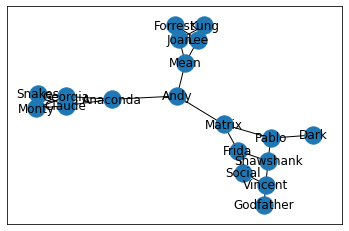

In [ ]:
nx.draw_networkx(G)

In [ ]:
employees = set(['Pablo', 'Lee', 'Georgia', 'Vincent',
                 'Andy','Frida','Joan','Claude'])

movies = set(['Shawshank',
              'Forrest',
              'Matrix',
              'Anaconda',
              'Social',
              'Godfather',
              'Monty',
              'Snakes',
              'Kung',
              'Dark',
              'Mean'])


In [ ]:
for i in G.nodes():
    if i in employees:
        G.add_node(i, type="employee")
    elif i in movies:
        G.add_node(i, type="movie")

In [ ]:
Rel = nx.read_edgelist('Employee_Relationships.txt' ,data=[('relationship_score', int)])

Rdf = pd.DataFrame(Rel.edges(data=True), columns=['From', 'To', 'relationship_score'])
Rdf.head(2)

,From,To,relationship_score
0,Andy,Claude,{'relationship_score': 0}
1,Andy,Frida,{'relationship_score': 20}


In [ ]:
from networkx.algorithms import bipartite

G  = bipartite.weighted_projected_graph(G, employees)

df = pd.DataFrame(G.edges(data=True), columns=['From', 'To', 'movies_score'])
df.head(5)

,From,To,movies_score
0,Joan,Andy,{'weight': 1}
1,Joan,Lee,{'weight': 3}
2,Claude,Andy,{'weight': 1}
3,Claude,Georgia,{'weight': 3}
4,Pablo,Andy,{'weight': 1}


In [ ]:
C = df.copy()
C.rename(columns={"From":"From1", "To":"From"}, inplace=True)
C.rename(columns={"From1":"To"}, inplace=True)
C

,To,From,movies_score
0,Joan,Andy,{'weight': 1}
1,Joan,Lee,{'weight': 3}
2,Claude,Andy,{'weight': 1}
3,Claude,Georgia,{'weight': 3}
4,Pablo,Andy,{'weight': 1}
5,Pablo,Vincent,{'weight': 1}
6,Pablo,Frida,{'weight': 2}
7,Vincent,Frida,{'weight': 2}
8,Georgia,Andy,{'weight': 1}
9,Andy,Lee,{'weight': 1}


In [ ]:
F = pd.concat([df, C])
F

,From,To,movies_score
0,Joan,Andy,{'weight': 1}
1,Joan,Lee,{'weight': 3}
2,Claude,Andy,{'weight': 1}
3,Claude,Georgia,{'weight': 3}
4,Pablo,Andy,{'weight': 1}
5,Pablo,Vincent,{'weight': 1}
6,Pablo,Frida,{'weight': 2}
7,Vincent,Frida,{'weight': 2}
8,Georgia,Andy,{'weight': 1}
9,Andy,Lee,{'weight': 1}


In [ ]:
fdf = pd.merge(F, Rdf, on = ['From', 'To'], how='right')
fdf

,From,To,movies_score,relationship_score
0,Andy,Claude,{'weight': 1},{'relationship_score': 0}
1,Andy,Frida,{'weight': 1},{'relationship_score': 20}
2,Andy,Georgia,{'weight': 1},{'relationship_score': -10}
3,Andy,Joan,{'weight': 1},{'relationship_score': 30}
4,Andy,Lee,{'weight': 1},{'relationship_score': -10}
5,Andy,Pablo,{'weight': 1},{'relationship_score': -10}
6,Andy,Vincent,NaN,{'relationship_score': 20}
7,Claude,Frida,NaN,{'relationship_score': 0}
8,Claude,Georgia,{'weight': 3},{'relationship_score': 90}
9,Claude,Joan,NaN,{'relationship_score': 0}


In [ ]:
import numpy as np

def set_value(v):
    if v is np.nan:
        return {'weight': 0}
    else:
        return v

In [ ]:
fdf['movies_score'] = fdf['movies_score'].map(set_value)
fdf

,From,To,movies_score,relationship_score
0,Andy,Claude,{'weight': 1},{'relationship_score': 0}
1,Andy,Frida,{'weight': 1},{'relationship_score': 20}
2,Andy,Georgia,{'weight': 1},{'relationship_score': -10}
3,Andy,Joan,{'weight': 1},{'relationship_score': 30}
4,Andy,Lee,{'weight': 1},{'relationship_score': -10}
5,Andy,Pablo,{'weight': 1},{'relationship_score': -10}
6,Andy,Vincent,{'weight': 0},{'relationship_score': 20}
7,Claude,Frida,{'weight': 0},{'relationship_score': 0}
8,Claude,Georgia,{'weight': 3},{'relationship_score': 90}
9,Claude,Joan,{'weight': 0},{'relationship_score': 0}


In [ ]:
fdf['movies_score'] = fdf['movies_score'].map(lambda x: x['weight'])
fdf['relationship_score'] = fdf['relationship_score'].map(lambda x: x['relationship_score'])
fdf

,From,To,movies_score,relationship_score
0,Andy,Claude,1,0
1,Andy,Frida,1,20
2,Andy,Georgia,1,-10
3,Andy,Joan,1,30
4,Andy,Lee,1,-10
5,Andy,Pablo,1,-10
6,Andy,Vincent,0,20
7,Claude,Frida,0,0
8,Claude,Georgia,3,90
9,Claude,Joan,0,0


In [ ]:
x = fdf['movies_score']
y = fdf['relationship_score']

x.corr(y)

0.7883962221733474